In [1]:
import pandas as pd
pd.options.io.excel.xlsx.writer = 'xlsxwriter'

dataset = pd.read_csv(r'./datas/数字化差异性分析数据.csv', index_col=None, header=0, dtype={'股票代码':'object'})
print(dataset.shape[0])
js_dataset = dataset[dataset['上市省份']=='江苏']
print(js_dataset[js_dataset['digital']==1].shape[0])  # 只有236个数据是1，但是我们不提的话或许可以提高准确率。
# js_dataset.reset_index(inplace=True, drop=True)
# 删除不需要的数据
js_dataset = js_dataset.drop(['上市省份'], axis=1)
js_dataset

26729
650


,股票代码,截止日期,企业年限,行业类别,权益乘数,速动比率,资本积累率B,固定资产增长率B,营业总收入增长率,销售费用增长率,...,股权性质,两权分离度(%),股权集中度4(%),独董比例,提供岗位增长率,员工收入增长率,研发强度,创新产出,董事会规模,digital
314,000301,2007,7.0,13.0,1.380405,0.668586,-0.006589,-0.273977,0.006221,0.041691,...,1,0.000000,40.2903,0.333333,0.263699,0.166207,2.003051,0.000000,2.302585,0
315,000301,2008,8.0,13.0,1.546510,0.492229,0.082254,-0.350255,-0.463183,-0.710069,...,1,0.000000,41.2454,0.333333,-0.394657,0.166207,2.003051,0.000000,2.302585,0
316,000301,2009,9.0,13.0,1.561810,0.724658,0.006033,-0.143850,-0.085466,0.813145,...,1,0.000000,43.7998,0.400000,0.069272,0.166207,2.003051,0.000000,2.397895,0
317,000301,2010,10.0,60.0,1.470518,1.270975,0.025920,-0.096754,0.233287,-0.668786,...,1,0.000000,41.7098,0.571429,0.028239,0.166207,2.003051,0.000000,2.079442,0
318,000301,2011,11.0,60.0,1.360832,1.019489,0.005543,-0.170452,0.170210,2.126254,...,1,0.000000,39.9150,0.384615,0.009693,0.166207,2.003051,0.000000,2.639057,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26718,870436,2022,1.0,32.0,1.778334,1.436806,-0.097942,-0.056501,-0.382923,-0.163350,...,0,16.988600,76.5233,0.333333,-0.030721,-0.114466,2.284421,4.234107,2.302585,0
26719,871396,2021,1.0,36.0,1.485790,2.525995,0.087010,-0.105547,-0.020185,-0.168257,...,0,5.108174,63.0868,0.250000,0.263699,0.166207,1.619388,2.708050,2.302585,1
26720,871396,2022,2.0,36.0,1.476032,2.110647,0.056330,0.182788,-0.087836,-0.070228,...,0,5.108174,63.0972,0.250000,0.010714,-0.048795,1.733424,3.496508,2.302585,1
26723,871642,2021,0.0,25.0,1.362160,1.854867,0.512965,0.379445,0.104335,0.105209,...,0,0.440000,71.3047,0.428571,0.263699,0.166207,2.512846,2.397895,2.079442,0


In [2]:
from sklearn.model_selection import train_test_split
from utils import  normalize

head = ['股票代码','截止日期']
Xnames=['企业年限', '行业类别', '权益乘数', '速动比率', '资本积累率B', '固定资产增长率B', '营业总收入增长率', '销售费用增长率', '管理费用增长率', '现金资产比率', '全部现金回收率', '净利润现金净含量', '营运指数', '资本支出与折旧摊销比', '营业净利率', '销售期间费用率', '投入资本回报率（ROIC）', '成本费用利润率', '应付账款周转率B', '存货周转率B', '应收账款周转率B', '经营杠杆', '财务杠杆', '两职合一', '本期销售额占年度销售总额比例(%)', '本期采购额占年度采购总额比例(%)', '股权性质', '两权分离度(%)', '股权集中度4(%)', '独董比例', '提供岗位增长率', '员工收入增长率', '研发强度', '创新产出', '董事会规模']
Ynames=['digital']
headset = js_dataset[head]
# 对数据进行标准化，数据量有点大，可以尝试单纯拿出江苏省数据先进行分析
# 思路A:是不是可以进一步对全国数据通过行业筛选研究？
X = normalize(js_dataset[Xnames], method='m')
X = pd.DataFrame(X,columns=Xnames)
y = js_dataset[Ynames].values.ravel()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [4]:
from sklearn.metrics import mean_squared_error # 均方误差
from sklearn.neural_network import MLPClassifier

# 'identity', 'logistic', 'tanh', 'relu'
# 'lbfgs', 'sgd', 'adam'
# 可以比较Aga_BP/lbfgs/之间的区别
# lbfgs:适合小数据集合; activation='tanh'

layris = 501
best_sizes = (1,)
best_score = 0
scores=[]
val_mses=[]
mses=[]

for i in range(1, layris):
    model = MLPClassifier(solver='adam', hidden_layer_sizes=(i,), random_state=132, max_iter=100000)
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    val_mse = mean_squared_error(y_test, model.predict(X_test))
    mse = mean_squared_error(y_train, model.predict(X_train))
    scores.append(score)
    mses.append(mse)
    val_mses.append(val_mse)
    if best_score < score:
        best_score = score
        best_sizes = (i, )    

In [3]:
import numpy as np

model = MLPClassifier(solver='adam', hidden_layer_sizes=best_sizes, random_state=132, max_iter=100000)

print(best_sizes)
model.fit(X_train, y_train)
# model.intercepts_
# model.coefs_
# model.n_iter_
print(f"R方:{model.score(X_test, y_test):.4f}; 迭代次数{model.n_iter_}")

NameError: name 'MLPClassifier' is not defined

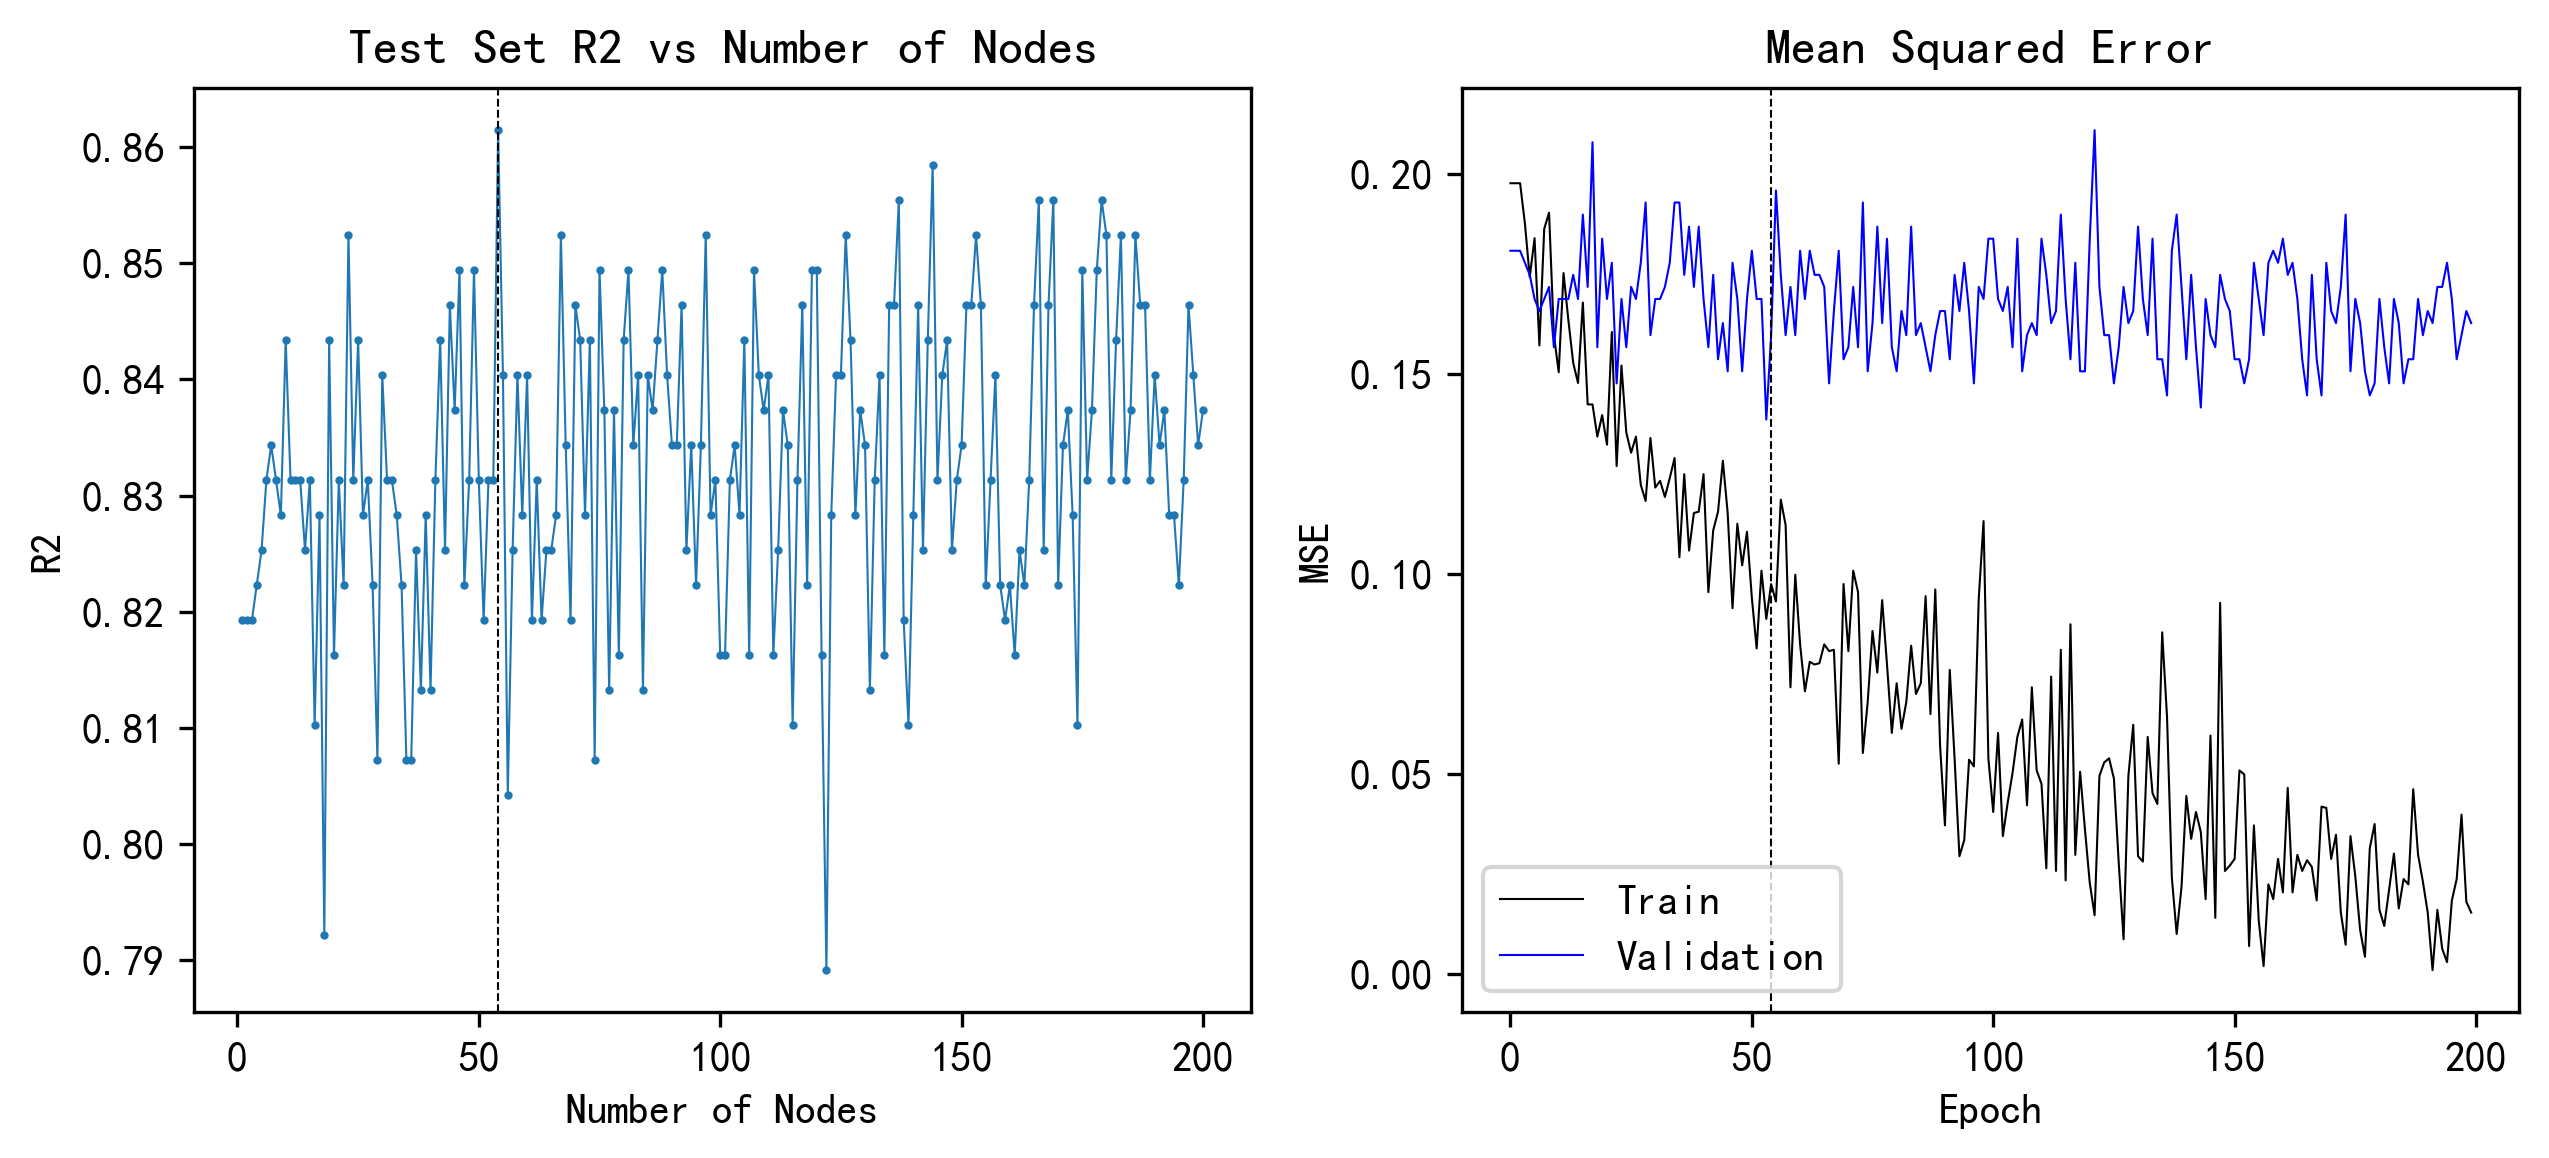

In [6]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False    # 用来正常显示负号

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), dpi=300)

index = np.argmax(scores)
start = 1

index = np.argmax(scores)
index2 = np.argmin(val_mses)

ax[0].plot(range(start, layris), scores, 'o-', linewidth=0.3, markersize=0.5)
ax[0].axvline(range(start, layris)[index], linestyle='--', color='k', linewidth=0.3)
ax[0].set_xlabel('Number of Nodes')
ax[0].set_ylabel('R2')
ax[0].set_title('Test Set R2 vs Number of Nodes')

ax[1].plot(mses, 'k', label='Train', linewidth=0.3)
ax[1].plot(val_mses, 'b', label='Validation', linewidth=0.3)
ax[1].axvline(index2 + 1, linestyle='--', color='k', linewidth=0.3)
ax[1].set_ylabel('MSE')
ax[1].set_xlabel('Epoch')
ax[1].set_title('Mean Squared Error')
plt.legend()
plt.show()

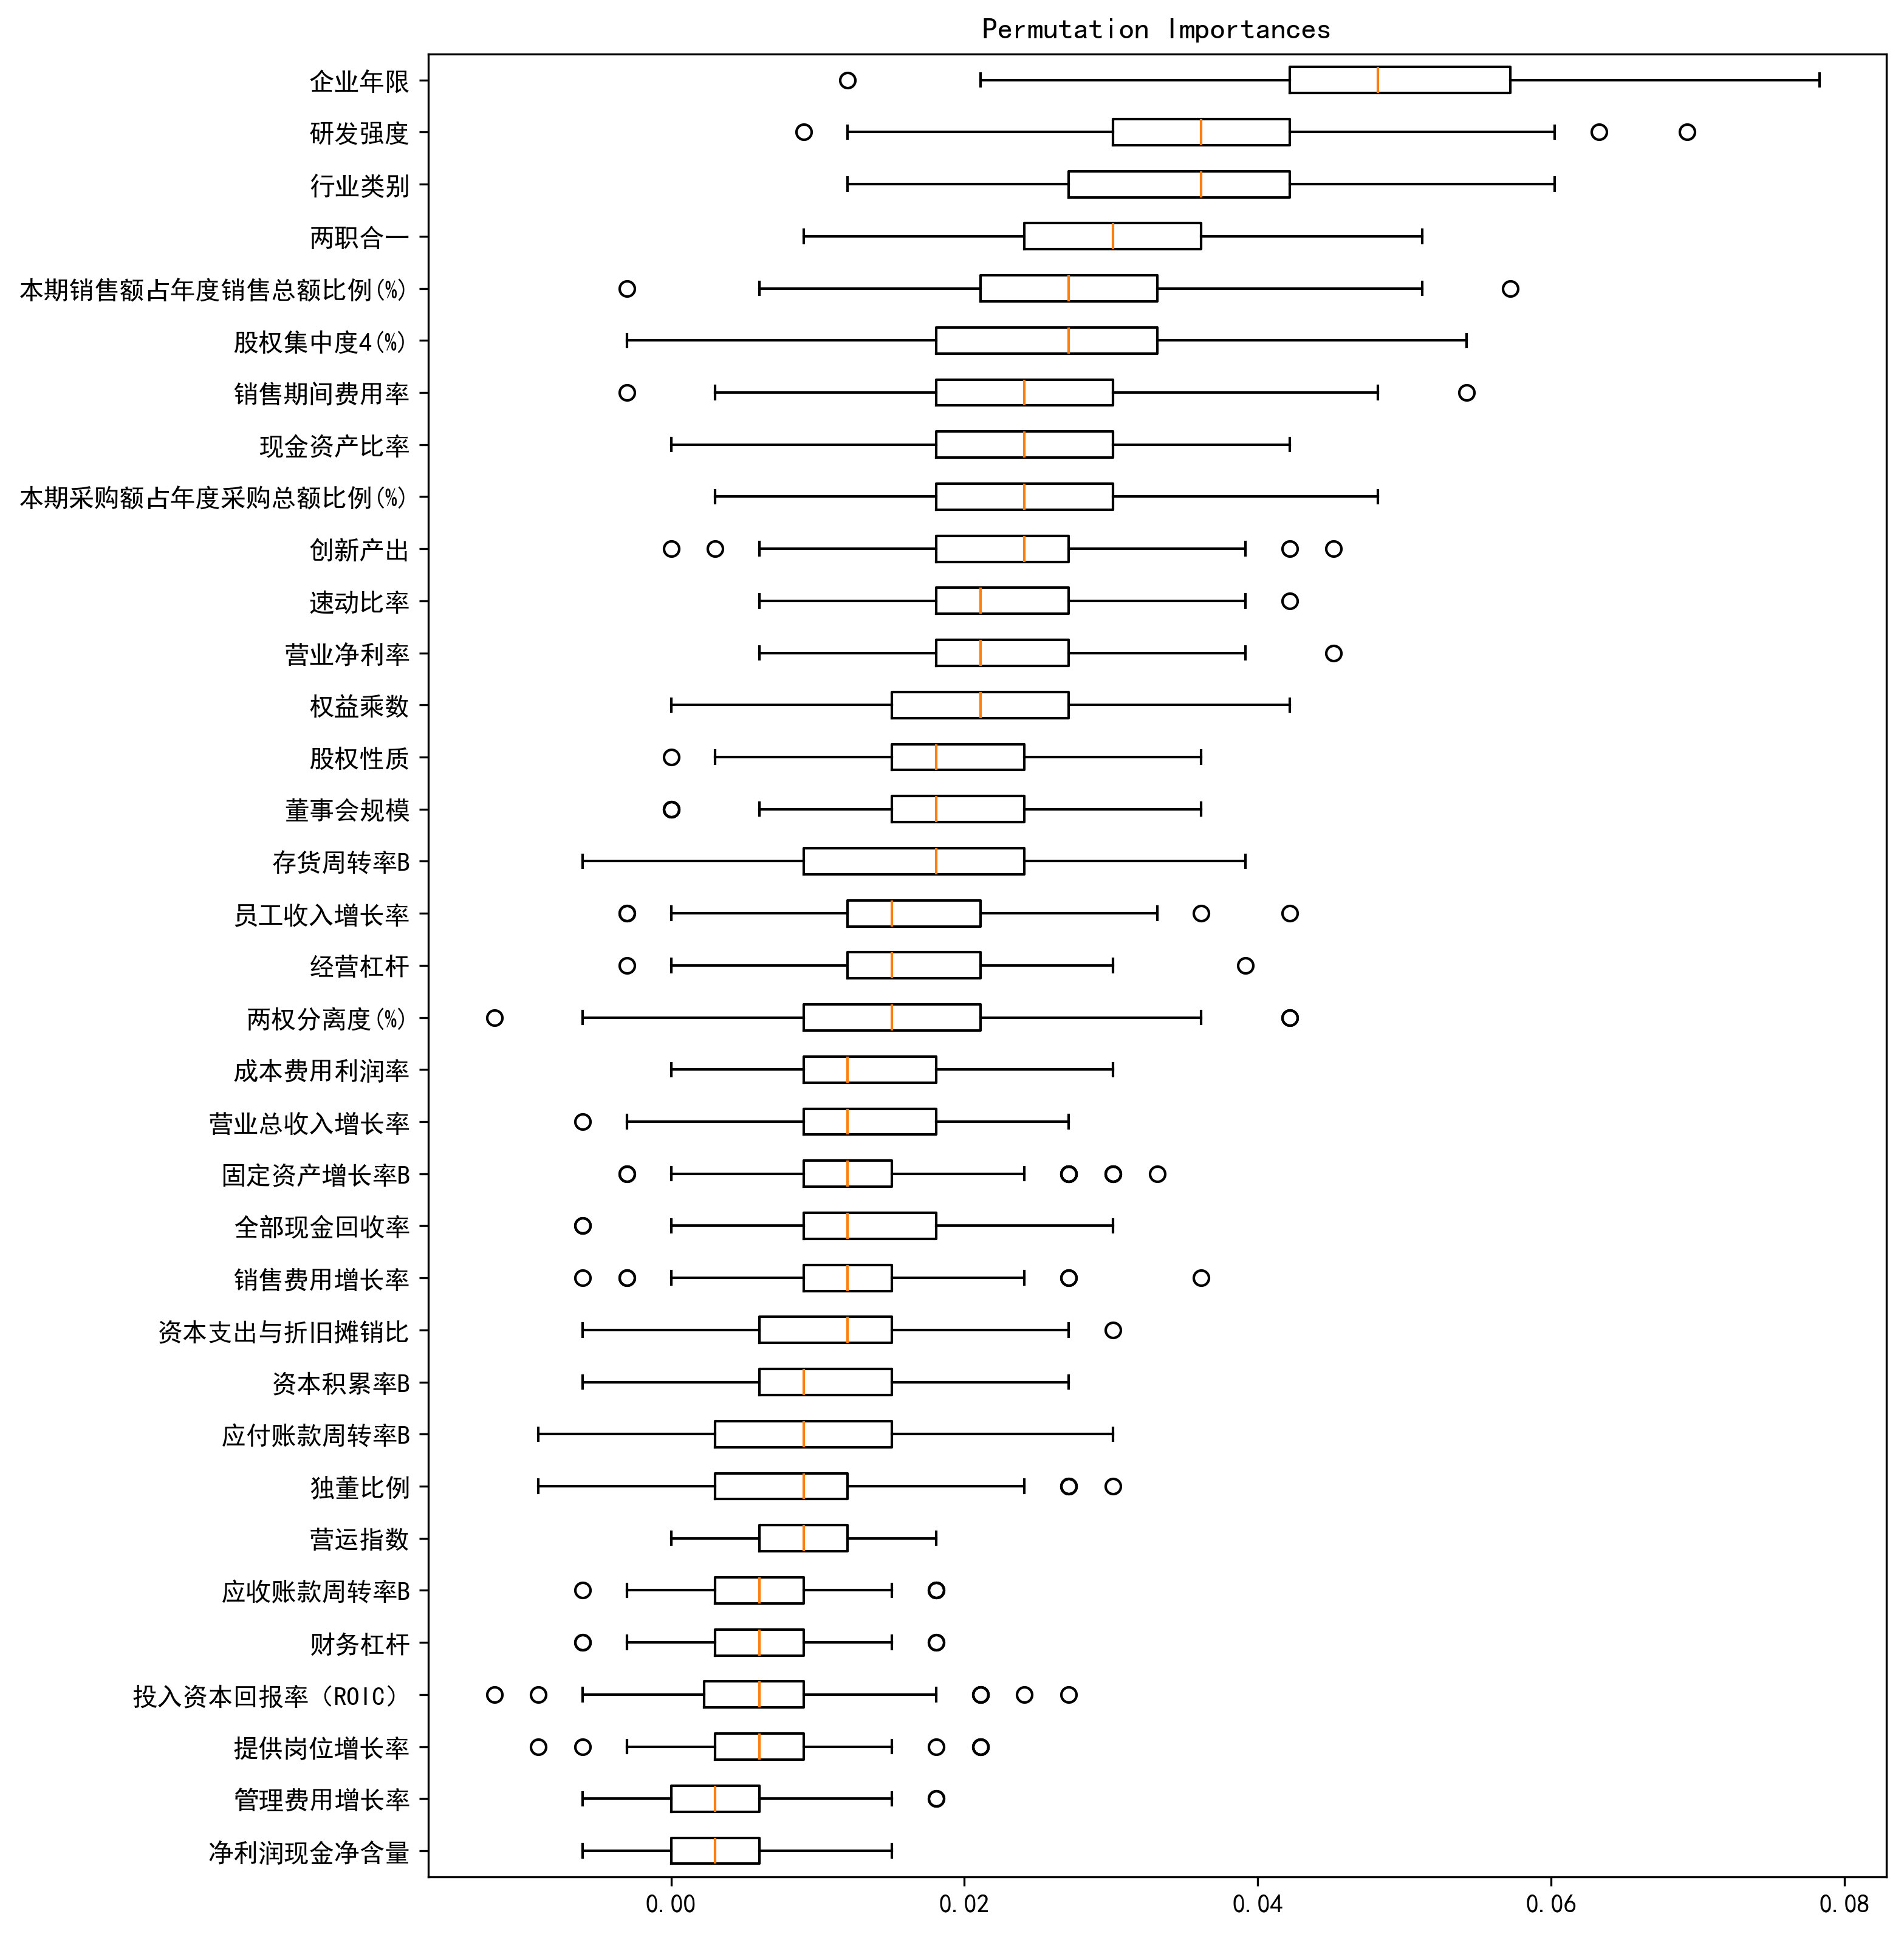

In [7]:
# 重要性
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei'] # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False # 用来正常显示负号

Bunch_result = permutation_importance(model, X_test, y_test, n_repeats=200, random_state=42)
# n_repeats=20：进行50次随机替换
# Bunch_result:[importance(置换重要度),importance_mean（置换重要度均值）,importance_std（置换重要度标准差）]

Bunch_index = Bunch_result.importances_mean.argsort()
nlabels = [Xnames[i] for i in Bunch_index]

fig = plt.figure(figsize=(8,10),dpi=300)
ax = fig.add_axes([0,0,1,1])

# Bunch_index = Bunch_result.importances_mean.argsort()
ax.boxplot(Bunch_result.importances[Bunch_index].T, vert=False,labels=nlabels)  #  labels=Xnames
plt.title('Permutation Importances')
plt.show()

神经网络模型无法像决策树、随机森林提升方法那样计算各个变量的重要性。——替代方法：计算置换重要度
使用训练集与基准模型，计算测试集的拟合优度；
对于某个特征变量，将此变量在训练集的观测值排序随机打乱——转化为噪音变量，即随机置换
重估模型并在此计算模型的拟合优度，则这两个模型拟合优度的差异就是置换重要性。
如：（0.8（第一次拟合优度）-0.6（第二次拟合优度）=0.2（置换重要性））
然而此结果受随机排序的影响，并不是确定的，一般需要重复多次，然后通过箱型图考察置换重要性的分布

In [5]:
# display = PartialDependenceDisplay.from_estimator( top_model,pd.DataFrame(X_train_s, columns=index),['LSTAT','B','RM'])
# # 使用最优拟合的模型绘制出的偏依赖图,变量RM对于响应变量MEDV的偏作用变为更为合理的单调上升关系

# from sklearn.inspection import PartialDependenceDisplay
# display = PartialDependenceDisplay.from_estimator(
#     model,pd.DataFrame(X_train_s,columns=index),['LSTAT','B','RM'])

# https://scikit-learn.org/dev/modules/generated/sklearn.inspection.PartialDependenceDisplay.html#sklearn.inspection.PartialDependenceDisplay
# 由下图可见，LSTAT对被解释变量MEDV（房价中位数）呈现出负向的似线性关系
# 特征变量RM（房间数）对被解释变量MEDV（房价中位数）的作用呈现出先降后升的非线性关系，似乎不太合理，或许和网络结构过于简单有关
# 由于只有5个神经元，可能欠拟合

思考还有没有其他可以优化的地方。
1.变量的偏相关性分析